In [1]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Callable

In [197]:
def g(x):
    return 3*x + 2

def rss(y_predicted, y_actual):
    return np.sum((y_actual-y_predicted)**2)

def tss(y_predicted, y_actual):
    y_ave = np.average(y_actual)
    return np.sum((y_predicted-y_ave)**2)

def r2calc(y1, ya):
    r2 = 1 - (rss(y1,ya)/tss(y1,ya))
    return r2

def pder_constant(x,b0,b1,y_actual): #vary b0
    y_predicted = predicted_linear_relation(x,b1,b0)
    a = np.sum(y_actual - y_predicted)
    b = -2/len(y_actual)
    const = a * b
    return const

def pder_grad(x,b0,b1,y_actual): #vary b1
    y_predicted = predicted_linear_relation(x,b1,b0)
    a = np.sum((y_actual - y_predicted) * x)
    b = -2/len(y_actual)
    gradient = a * b
    return gradient

def predicted_linear_relation(x,m,c): #expect x as np.array
    a = m*x + c
    return a

def mse(y_predicted, y_actual) -> float:
    n = len(y_actual)
    print(y_predicted - y_actual)
    return (1/n)*np.sum((y_actual-y_predicted)**2)

2.5102920781916827 4.629884148993251 0.8711577635820026 10000


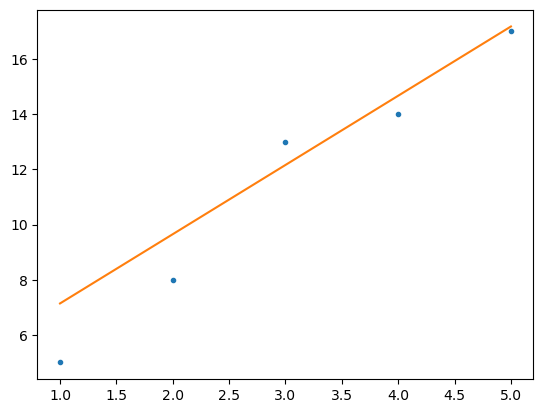

In [207]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

runs, r2 = 0, 0
lr = 1e-5
m, c = 6, 6

plt.plot(x,ya,'.')

while runs < 10000 and r2 < 0.95:
    diff = lr * pder_grad(x,m,c,ya)
     # print("diff: " + str(diff))
    if diff < 0.00045:
         pass
    else:
        m-= diff
    diff = lr * pder_constant(x,m,c,ya)
    # print("diff: " + str(diff))
    if diff < 0.0001:
       pass
    else:
        c-=diff
    if r2 > 0.95:
        break
    yp = predicted_linear_relation(x,m,c)
    r2 = r2calc(yp,ya)
    runs += 1
#    print(runs, m, c, w, sep = '\t')
plt.plot(x,yp)
print(m,c,r2, runs)

plt.show()

[ -2.  -4.  -8.  -8. -10.]
[-1.9 -3.8 -7.7 -7.6 -9.5]
[-1.8 -3.6 -7.4 -7.2 -9. ]
[-1.7 -3.4 -7.1 -6.8 -8.5]
[-1.6 -3.2 -6.8 -6.4 -8. ]
[-1.5 -3.  -6.5 -6.  -7.5]
[-1.4 -2.8 -6.2 -5.6 -7. ]
[-1.3 -2.6 -5.9 -5.2 -6.5]
[-1.2 -2.4 -5.6 -4.8 -6. ]
[-1.1 -2.2 -5.3 -4.4 -5.5]
[-1. -2. -5. -4. -5.]
[-0.9 -1.8 -4.7 -3.6 -4.5]
[-0.8 -1.6 -4.4 -3.2 -4. ]
[-0.7 -1.4 -4.1 -2.8 -3.5]
[-0.6 -1.2 -3.8 -2.4 -3. ]
[-0.5 -1.  -3.5 -2.  -2.5]
[-0.4 -0.8 -3.2 -1.6 -2. ]
[-0.3 -0.6 -2.9 -1.2 -1.5]
[-0.2 -0.4 -2.6 -0.8 -1. ]
[-0.1 -0.2 -2.3 -0.4 -0.5]
[ 1.77635684e-15  3.55271368e-15 -2.00000000e+00  7.10542736e-15
  7.10542736e-15]
[ 0.1  0.2 -1.7  0.4  0.5]
[ 0.2  0.4 -1.4  0.8  1. ]
[ 0.3  0.6 -1.1  1.2  1.5]
[ 0.4  0.8 -0.8  1.6  2. ]
[ 0.5  1.  -0.5  2.   2.5]
[ 0.6  1.2 -0.2  2.4  3. ]
[0.7 1.4 0.1 2.8 3.5]
[0.8 1.6 0.4 3.2 4. ]
[0.9 1.8 0.7 3.6 4.5]
[1. 2. 1. 4. 5.]
[1.1 2.2 1.3 4.4 5.5]
[1.2 2.4 1.6 4.8 6. ]
[1.3 2.6 1.9 5.2 6.5]
[1.4 2.8 2.2 5.6 7. ]
[1.5 3.  2.5 6.  7.5]
[1.6 3.2 2.8 6.4 8. ]
[1.7 

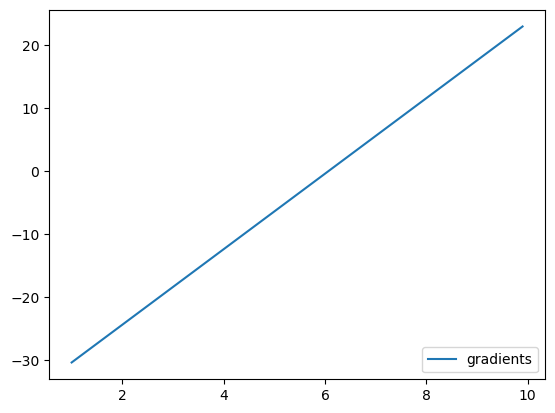

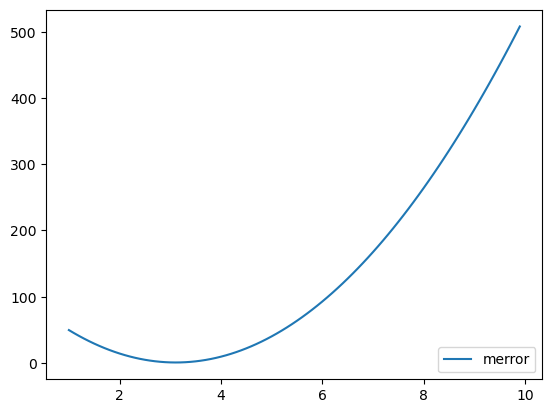

In [184]:
insert = np.arange(1,10,0.1)
gradients = []
merror = []
for a in insert:
    gradients.append(pder_grad(x, a, 2, ya))
    merror.append(mse(predicted_linear_relation(x,a,2), ya))


plt.plot(insert, gradients, label='gradients')
plt.legend(loc = 'lower right')
plt.show()

plt.plot(insert, gradients, label='gradients')
plt.legend(loc = 'lower right')
plt.show()

25.18248
25.1498721042912
25.117305338308174
25.08477965010472
25.052294987800238
25.019851299579642
24.987448533693282
24.955086638456876
24.9227655622514
24.890485253523032
24.85824566078304
24.82604673260774
24.793888417638378
24.761770664581054
24.729693422206665
24.697656639350786
24.665660264913626
24.633704247859924
24.60178853721885
24.56991308208398
24.53807783161315
24.50628273502842
24.474527741615976
24.44281280072606
24.411137861772843
24.37950287423443
24.347907787652687
24.316352551633244
24.28483711584534
24.253361430021798
24.22192544395891
24.190529107516372
24.159172370617213
24.127855183247704
24.096577495457268
24.065339257358403
24.034140419126633
24.002980931000394
23.97186074328097
23.9407798063324
23.90973807058141
23.878735486517346
23.847772004692068
23.816847575719883
23.78596215027748
23.755115679103824
23.724308113000106
23.693539402829636
23.662809499517785
23.6321183540519
23.601465917481235
23.570852140916855
23.540276975531558
23.509740372559822
23.479

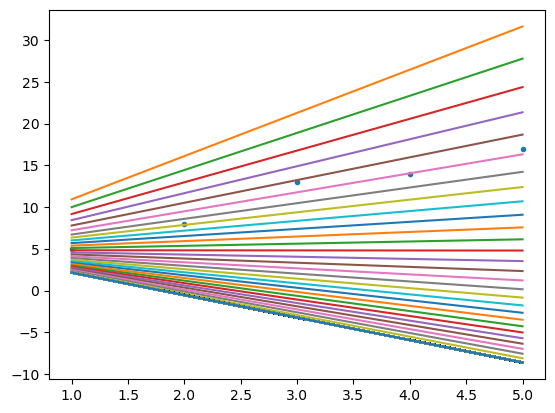

In [193]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

runs, r2 = 0, 0
lr = 1e-4
m, c = 6, 6

plt.plot(x,ya,'.')

while runs < 1000 and r2 < 0.95:
    for _ in range(100):
        diff = lr * pder_grad(x,m,c,ya)
     # print("diff: " + str(diff))
        if diff < 0.001:
           pass
        else:
            m-= diff
        diff = lr * pder_constant(x,m,c,ya)
        # print("diff: " + str(diff))
        if diff < 0.001:
            pass
        else:
            c-=diff
        if r2 > 0.95:
            break
    yp = predicted_linear_relation(x,m,c)
    plt.plot(x,yp)
    r2 = r2calc(yp,ya)
    runs += 1
print(m,c,r2, runs)

In [166]:
x = np.array([1,2,3,4,5])
y = 3*x + 2
ya = y
ya[2] = 13

2.999971970956401 2.40010119374096 0.9644437799400153


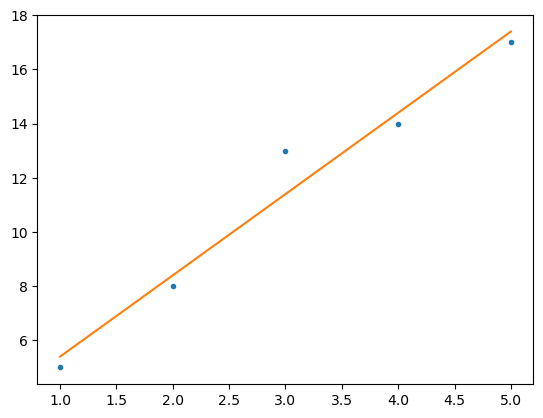

In [215]:
m = 6
c = 6
L = 0.0001
epochs = 300000
n = float(len(x))
for i in range(epochs):
    Y_pred = m*x + c
    D_m = (-2/n) * sum(x * (ya - Y_pred))
    D_c = (-2/n) * sum(ya - Y_pred)
    m -= L * D_m
    c -= L * D_c

print(m,c, r2)
new = np.array([])
new = m*x + c
yp = predicted_linear_relation(x,m,c)
r2 = r2calc(yp, ya)
plt.plot(x, ya, ".")
plt.plot(x, new)
plt.show()